<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">

**Привет, Александр!** 👋

Меня зовут Сергей Самойлов, я подготовил проект.
В Яндекс Практикуме принято общаться на "ты", но если некомфортно - скажи и перейдем на "Вы".

Моя основная цель - научиться.
Поэтому, пожалуйста, указывай на ошибки, делись опытом и помогай в освоении машинного обучения.

В JupyterNotebook ожидаю увидеть твои комментарии. Знаю, что их не надо удалять, перемещать или изменять.
У комментариев могут быть приписки **V2**, **V3**, **V...** (или другие твой выбор), которые соответствуют каждой версии проверки.

Предлагаю использовать цветовую разметку:
<p>
<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b>

Так выделены критические замечания. </div>

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>  Комментарий ревьюера ⚠️</b>

Так выделены небольшие замечания или полезные советы. Постараюсь их учесть.</div>
<p>
<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Так выделены правильные решения.</div>

Предлагаю работать в диалоге: если что-то дорабатываю или отвечаю на твой комментарий - напишу об этом.
Тебе будет удобней, если я выделю свои комментарии:
<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Здесь исправил.</div>

Все это поможет мне научиться, а тебе - быстрее принять мой проект.</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Оригинальное вступление, у меня даже на пару секунд когнитивный диссонанс случился =))

# Рекомендация тарифов

# Исследование:

# закономерности выбора тарифов сотового оператора "Мегалайн"

## Цели исселедования:

- выявить закономерности перехода на новые тарифы
- результаты исследования помогут создать модель, которая подберёт подходящий тариф для клиентов "старых" тарифов
- разработать модель
- построить модель с максимально большим значением accuracy
    
## Файл исследования:

- данные о поведении клиентов, которые выбрали новые тарифы '/datasets/users_behavior.csv'
    
## План работы:

- изучить данные о поведении клиентов, которые уже перешли на новые тарифы 
- выявить зависимости сгруппированных данных согласно целям исследования
- доказательно описать выявленные закономерности
- представить выводы по каждому из разделов подготовки исследования
- построить модель с максимально большим значением accuracy (не менее 0.75)
- проверить accuracy на тестовой выборке
- подготовить общий вывод

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

In [24]:
# Эти установки дополнят jupyter и обновят устаревшую версию matplotlib 
!pip install rich 
!pip install -U matplotlib
!pip install imblearn

## Откройте и изучите файл

*["All models are wrong, but some are useful"](https://en.wikipedia.org/wiki/All_models_are_wrong)*

In [25]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd
import plotly.express as px

from imblearn.over_sampling import RandomOverSampler
from IPython.display import display
from rich import print
from rich.console import Console
from rich.panel import Panel
from rich.traceback import install
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [26]:
install()
console = Console()
matplotlib.rcParams['figure.figsize'] = [15, 7]

In [27]:
try:
    df = pd.read_csv('/datasets/users_behavior.csv')
    console.print(
        ':thumbs_up: файл исследования загружен из локального репозитория.',
        style='bold #8845cc',
        justify="center"
    )
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')
    console.print(
        ':computer: файл исследования загружен из сети.',
        style='bold #8845cc',
        justify="center"
    )

                                      💻 файл исследования загружен из сети.                                       

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
    
Здорово, что ты используешь конструкцию `try-except`, это повышает отказоустойчивость кода

</div>

In [7]:
about_table = '[cyan]Рядов[/]: {}\n[cyan]Колонок[/]: {}'.format(*df.shape)
print(Panel(about_table, title='[#8845cc]Файл исследования users_behavior.csv состоит из[/]:'))

╭─────────────────────────────── Файл исследования users_behavior.csv состоит из: ────────────────────────────────╮
│ Рядов: 3214                                                                                                     │
│ Колонок: 5                                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [8]:
console.print('Изучим первые пять рядов датафрейма', style='bold #8845cc', justify="center")
display(df.head());

                                        Изучим первые пять рядов датафрейма                                        

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [9]:
console.print('Проверим пропуски и тип данных в датафрейме', style='bold #8845cc', justify="center")
display(df.info());

                                    Проверим пропуски и тип данных в датафрейме                                    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

In [10]:
console.print('Посмотрим на минимальные, максимальные и средние значения', style='bold #8845cc', justify="center")
df.describe()

                             Посмотрим на минимальные, максимальные и средние значения                             

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


                                     Изучим распределение данных в датафрейме                                      

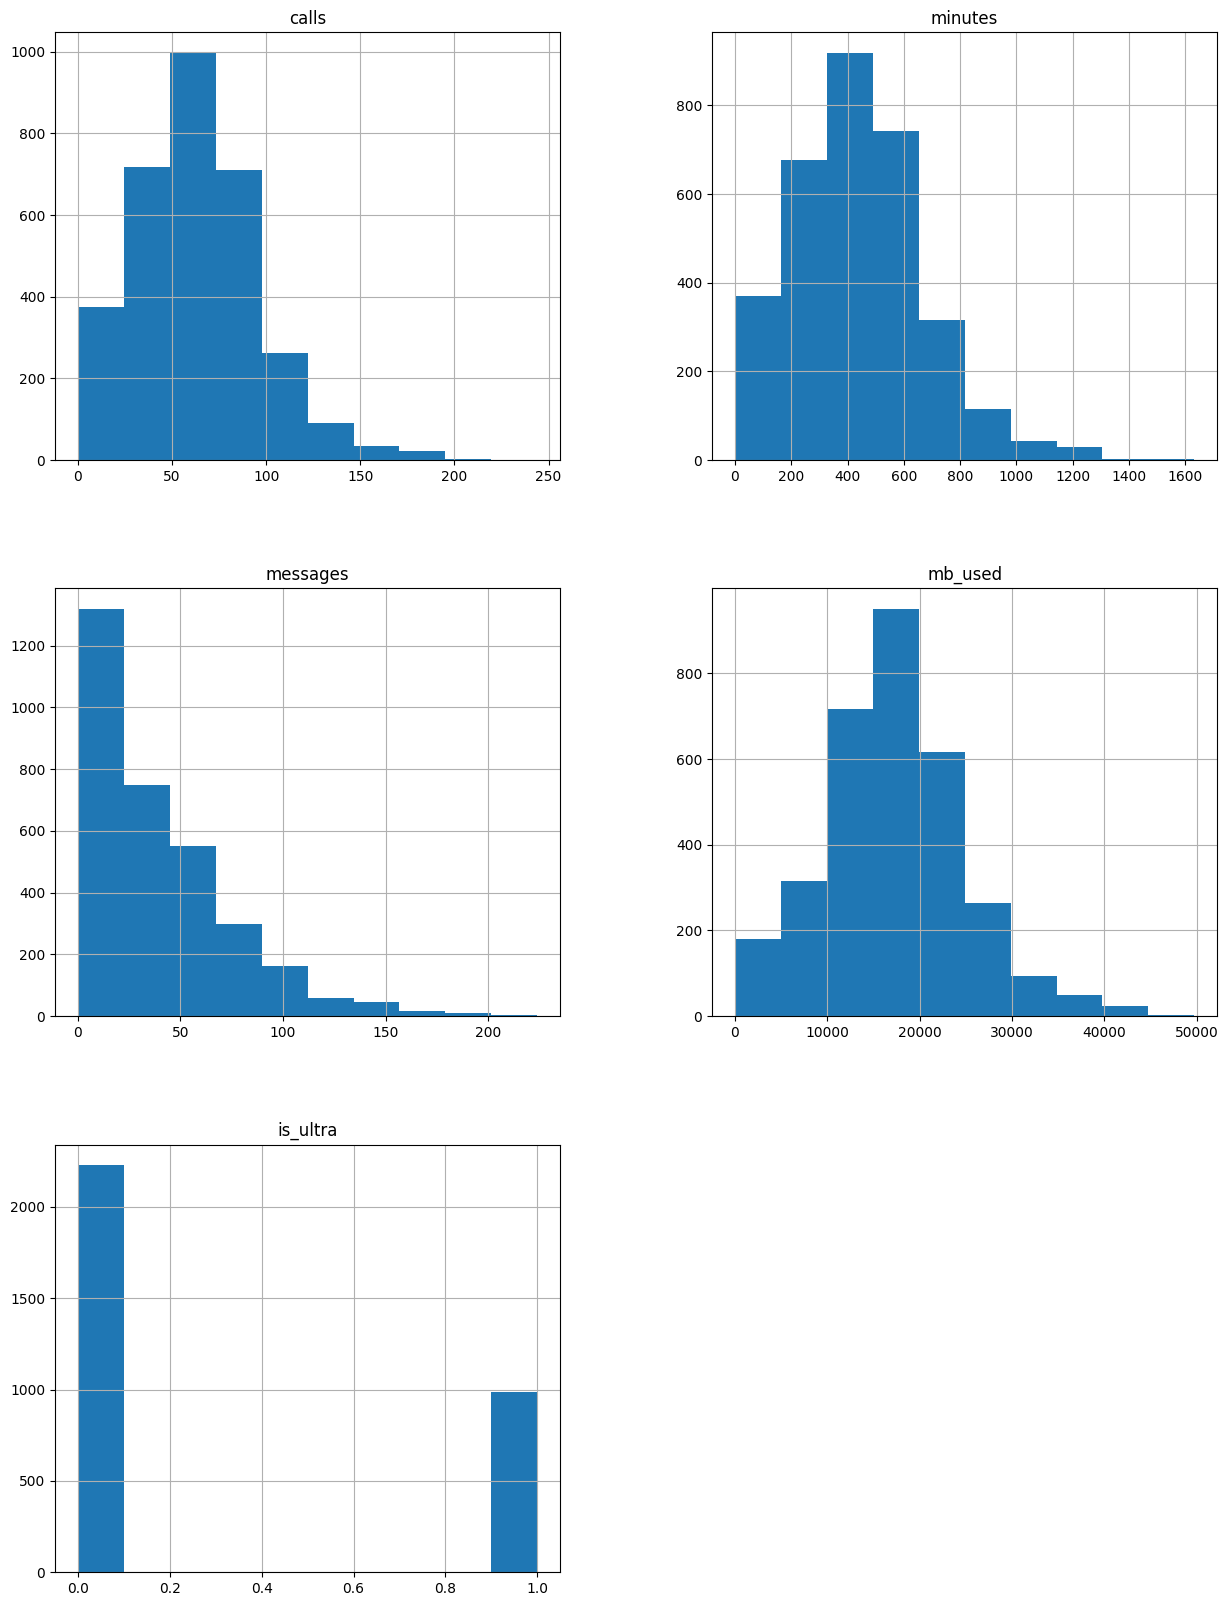

In [11]:
console.print('Изучим распределение данных в датафрейме', style='bold #8845cc', justify="center")
df.hist(figsize=(15, 20));

**Вывод после первого знакомства с данными:**
    
В датафрейме - пять столбцов. Все данные заполнены, пропусков нет. Предобработка данных (согласно описанию проекта) не требуется.

Распределение клиентов по тарифам неравномерное. "Смарт" выбирают в два с лишним раза чаще, чем "Ультра".
    
Столь сильное различие, скорее всего, будет отражаться и в поведении соответсвующих групп. К примеру, возможно, что клиенты с "Ультра" расходуют интернет трафик в значительно больших объемах или ведут долгие переговоры.

In [12]:
# Проверка на явные дубликаты
duplicated_df = df[df.duplicated()]
dup_in_df = f'Количество явных дубликатов: {len(duplicated_df)}'
print(Panel(dup_in_df, title='[#8845cc]Поиск явных дубликатов[/]:'))

╭──────────────────────────────────────────── Поиск явных дубликатов: ────────────────────────────────────────────╮
│ Количество явных дубликатов: 0                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

**Распределение данных на примере "использованные мегабайты мобильного интернета"**
    
Посмотрим на график распределений пользователей по потребляемому трафику. Более высокие значения от 40 гигабайт и более характерны только для пользователей тарифа "Ultra".
    
Схожая картина наблюдается и в данных других столбцов. Таким образом, предмет для создания модели и предсказание тарифа для перехода, как минимум для части аудитории, есть.

In [14]:
ultra = df['mb_used'][df['is_ultra'] == 1]
smart = df['mb_used'][df['is_ultra'] == 0]

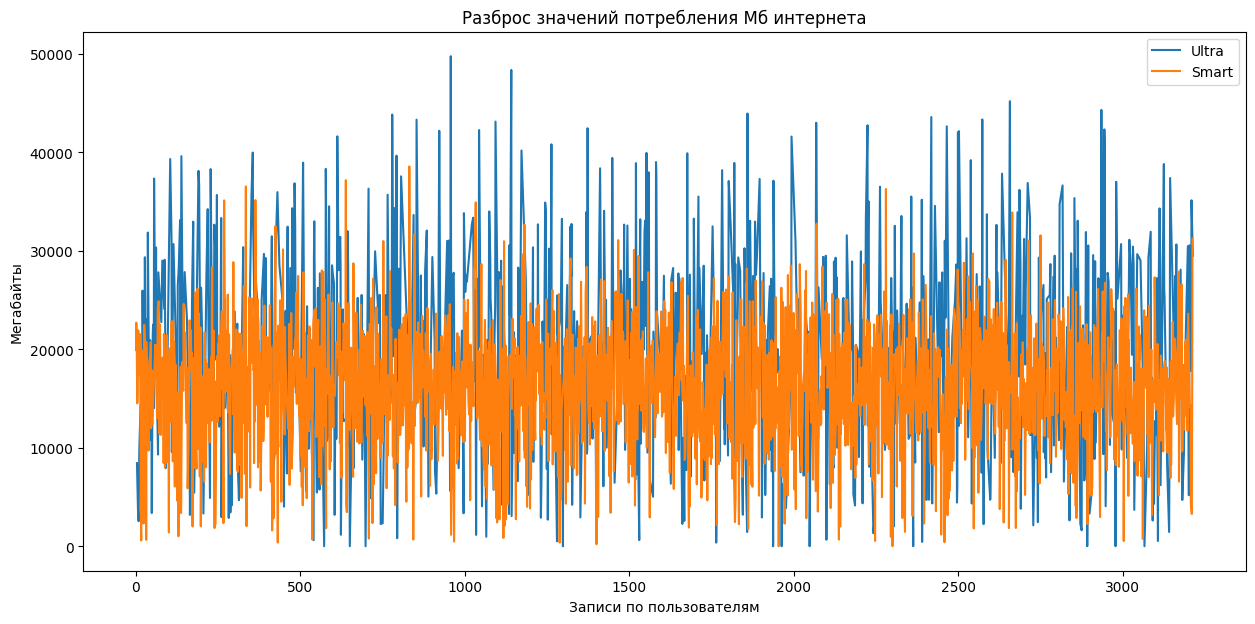

In [15]:
plt.plot(ultra, label='Ultra')
plt.plot(smart, label='Smart')
plt.title("Разброс значений потребления Мб интернета")
plt.ylabel("Мегабайты")
plt.xlabel("Записи по пользователям")
plt.legend()
plt.show;

<div class="alert-info" style="padding: 20px; border-radius: 10px">
Этот график был мне нужен для предварительной оценки. Увидел полосу значений где встречаются оба тафрифа. Но самое главное - есть зоны характерые только для "Smart". А раз так, то можно строить модели и делать прогнозы о том, какой тариф советовать клиенту.

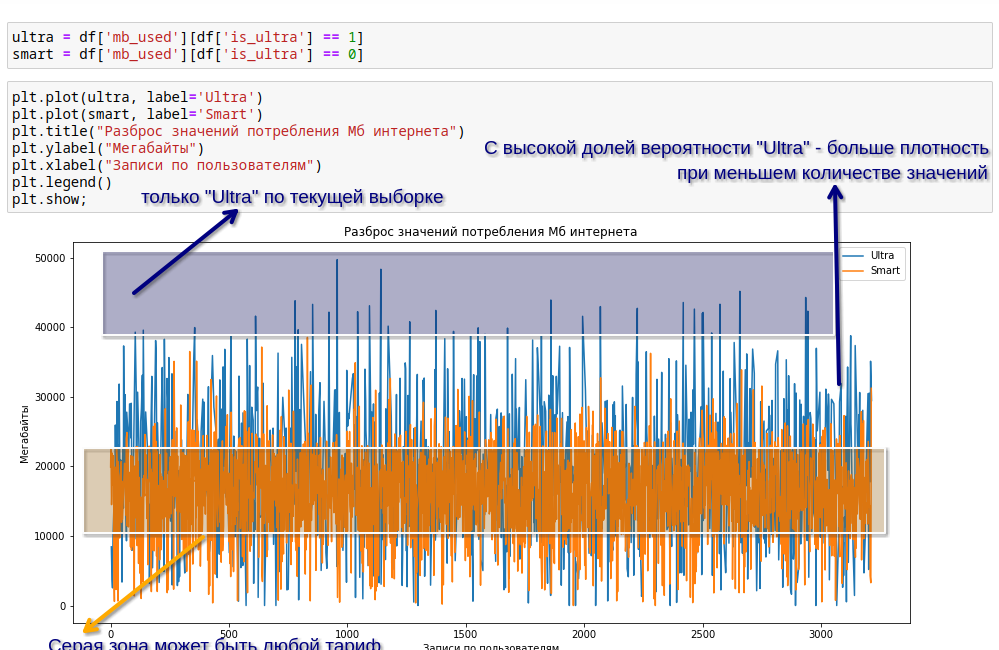
</div>

max                       
         calls gb_used hours messages
is_ultra                             
0          198      38    23      143
1          244      49    27      224

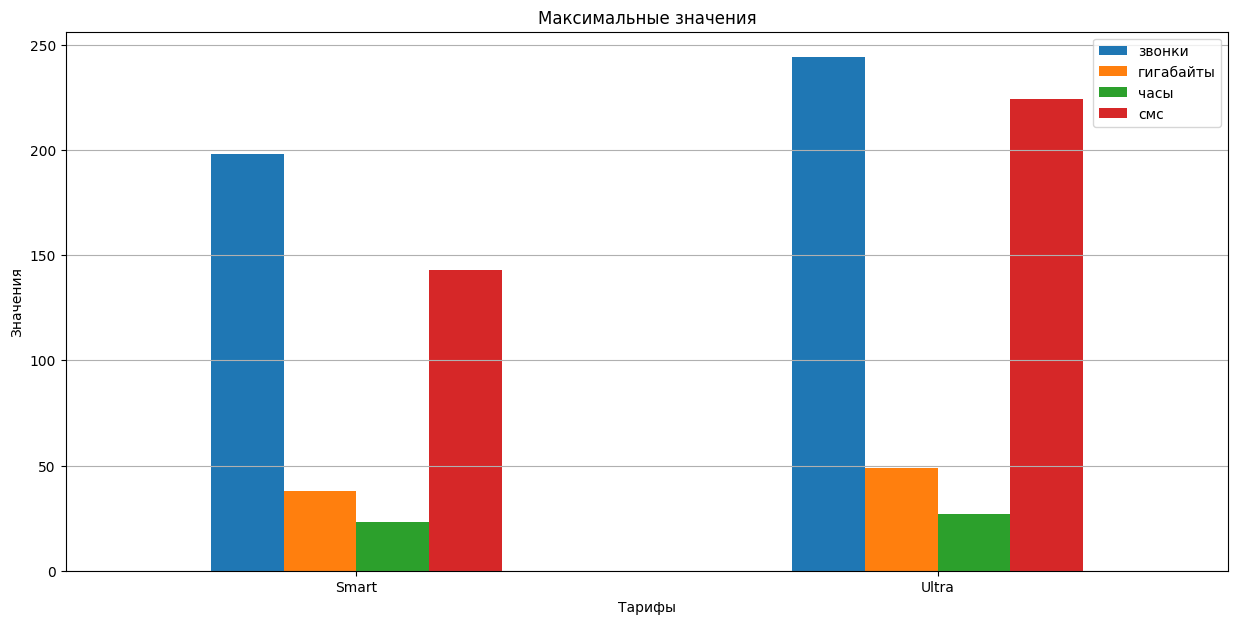

mean                       
         calls gb_used hours messages
is_ultra                             
0           58      16     7       33
1           73      19     9       49

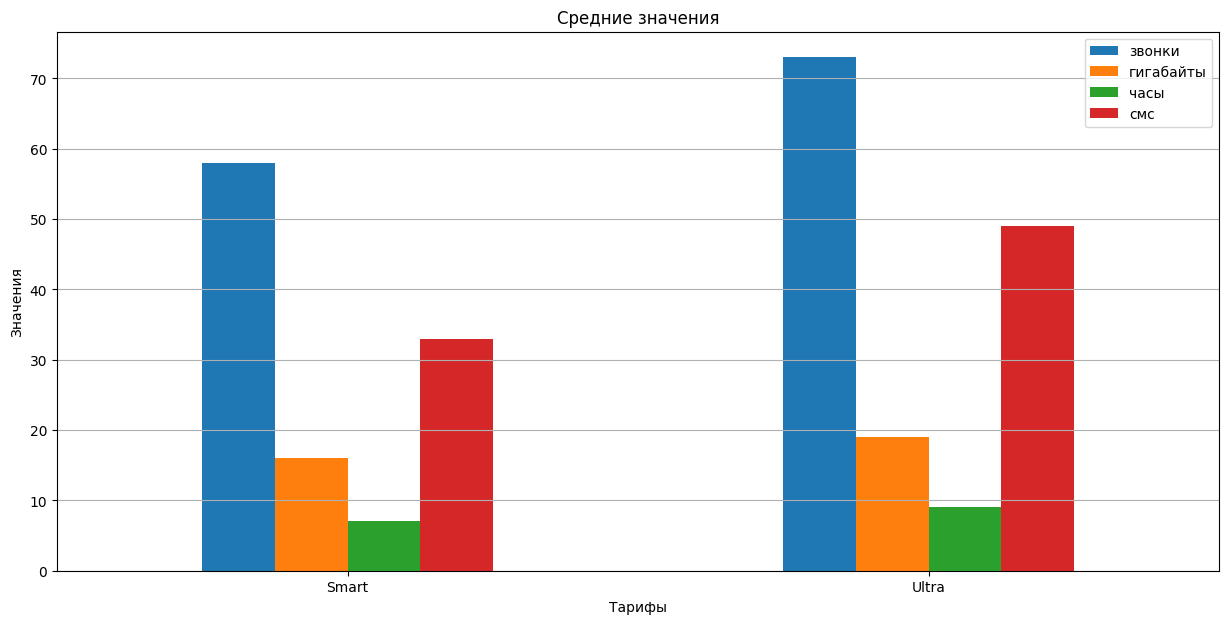

median                       
          calls gb_used hours messages
is_ultra                              
0            60      16     7       28
1            74      19     8       38

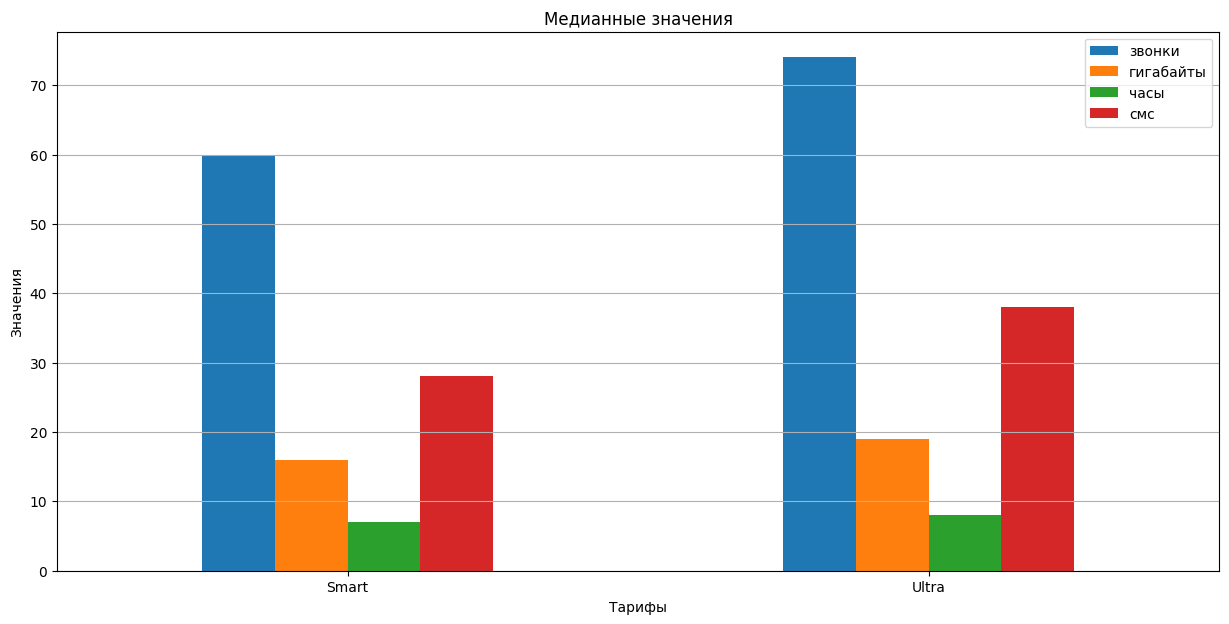

In [20]:
df2 = df.copy()
df2['gb_used'] = df2['mb_used'] / 1024
df2['hours'] = df2['minutes'] / 60
df2 = df2.drop(['mb_used', 'minutes'], axis=1)
funcs = 'max', 'mean', 'median'
titles = 'Максимальные значения', 'Средние значения', 'Медианные значения'

for f, t in zip(funcs, titles):
    df_pivot_table = round(df2.pivot_table(index=['is_ultra'], aggfunc=[f]))
    display(df_pivot_table.astype(np.int64))
    ax = df_pivot_table.plot.bar()
    plt.title(t)
    plt.legend(['звонки', 'гигабайты', 'часы', 'смс'])
    plt.ylabel("Значения")
    plt.xlabel("Тарифы")
    xtick_labels = 'Smart', 'Ultra'
    ax.set_xticklabels(xtick_labels)
    plt.xticks(rotation = 0)
    ax.grid(axis='y')
    plt.show()

In [21]:
console.print('Количество клиентов по тарифам в исследуемых данных', style='bold #8845cc', justify="center")
df.groupby(['is_ultra']).count()

                                Количество клиентов по тарифам в исследуемых данных                                

,calls,minutes,messages,mb_used
is_ultra,,,,
0,2229,2229,2229,2229
1,985,985,985,985


In [30]:
columns_ru = 'звонки', 'минуты', 'смс', 'Mb_интернета'

for i, j in zip(df.columns[:-1], columns_ru):
    fig = px.box(
    df,
    x='is_ultra',
    y=i,
    labels={'is_ultra': 'Тариф', i: j},
    )

    
    fig.update_layout(
        title=dict(
            text=f'"Ящик с усами" - {j}',
            font=dict(size=24),
            xref="paper"
        )
    )

    fig.show()

**"Ящики с усами" подтверждают предположение предварительного вывода**

Пользователи тарифа "Ультра" в среднем делают больше звонков, говорят дольше, пишут больше смс и тратят больше мегабайт, чем пользователи тарифа "Смарт".

**"Целевая аудитория по "ящикам с усами"**

По полученным в результате исследования данным можно предположить, что клиенты оператора, которые будут склонны перейти со старых тарифов на новые "Смарт" и "Ультра" находятся по своим показателям в межквартильном интервале соответствующих выборок.
    
Звонки: от 40 до 104
    
Минуты: от 274 до 730

СМС: от 10 до 79

Интернет: от 12 до 26

**"Наблюдение:**

Медианное значение тарифа "Ультра" очень близко к верхней границе межквартильного интервала тарифа "Смарт". А значит, пользователям старых тарифов, чьи показатели выше медианного значения тарифа "Ультра" стоит предлагать именно "Ультра". Доля этого тарифа меньше 1/3, но он даёт большую вовлечённость пользователя, возможно, приносит больше прибыли на одного абонента. Скорее всего, стоит дороже, а значит привлекается более состоятельная аудитория, которая имеет возможность тратить средства не только на прямые услуги связи, но  и "сопутствующие услуги" оператора "Мегалайн". 
    
В зонах 100% пересечения поведения (показателей) пользователей можно предлагать и тот и другой тарифы. У нас сейчас недостаточно данных по текущей выборке, чтобы сделать правильное, с вероятностностной точки зрения, предположение о предпочтительном тарифе.
    
- Из текущих данных ничего не известно о старых тарифах. Возможно, там безлимиты бесплатные. Тогда нет смысла затрачивать ресурсы на рассылку или создание таргетированной рекламы.
- Были причины, по которым пользователи до сих пор не перешли на новые тарифы. Об этих резонах мы можем догадываться: привычка (всё устраивает), отсутствие информации, удобство (не нужно менять настройки автоплатежей, к примеру) и т.д.
- Если новые тарифы для пользователя всё же привлекательны (подразумеваем, что так и есть), то выбор о приоретном предложении тарифа предстоит делать исходя из сравнительного анализа. К примеру, если пользователь по показателям ниже медианного значения "Смарт", ему предлагаем "Смарт", если выше, то "Ультра. Но это при 100% попадании в зону перекрытую тем и другим тарифами. Другие ситуации описал выше.

**Оценим релевантность столбцов**

Возможно существуют данные, которые будут вносить шум, но не являются определяющими факторами для предложения того или иного тарифа. К примеру, если обнаружится тотальное перекрытие или "размытые границы", такие данные придётся исключить. Они будут путать модель и ухудшать результаты её работы.

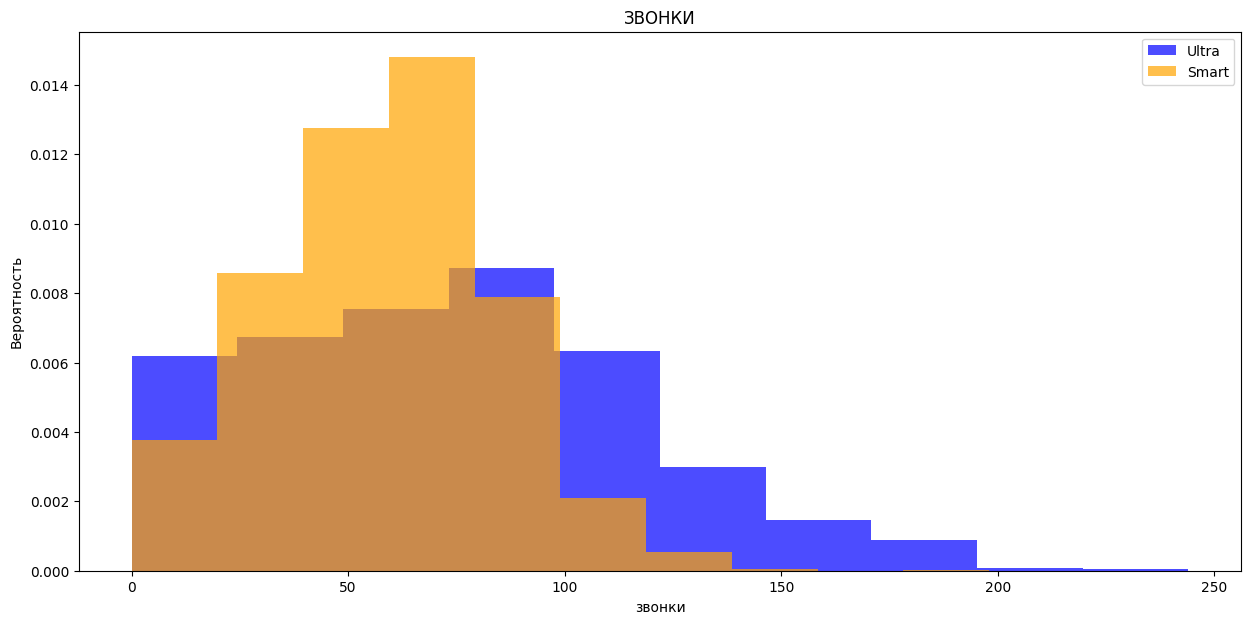

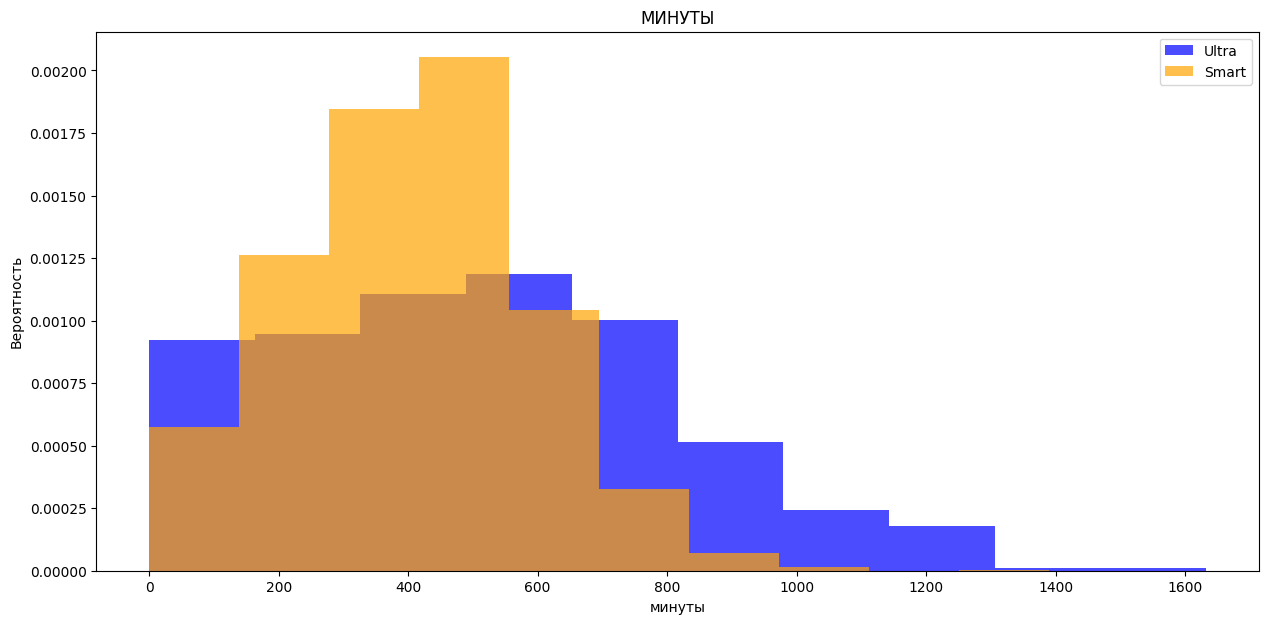

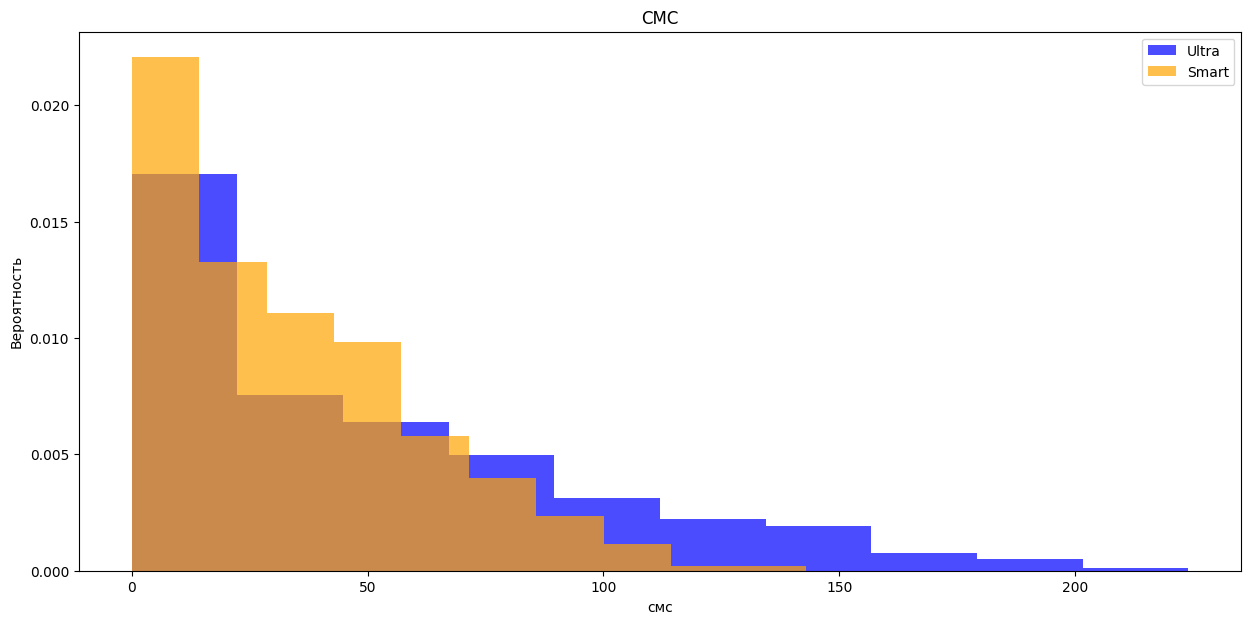

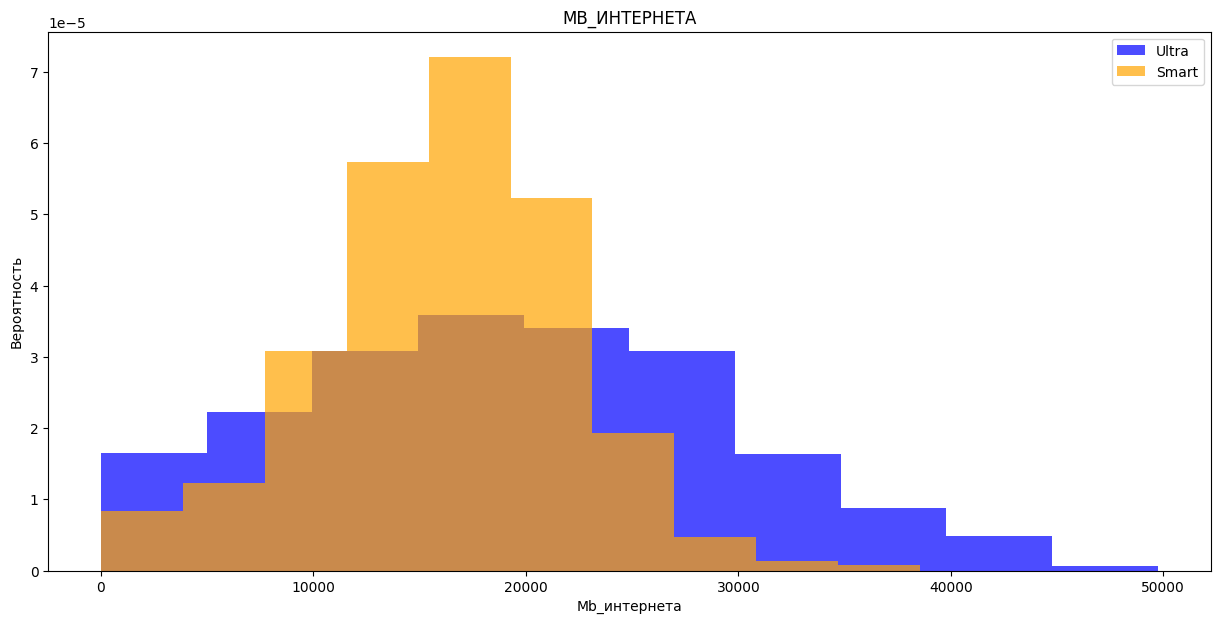

In [31]:
for label, j in zip(df.columns[:-1], columns_ru):
    # параметр density=True обеспечивает нормализацию данных, их можно будет сравнивать на гистограмме
    plt.hist(df[df['is_ultra'] == 1][label], color='blue', label='Ultra', alpha=0.7, density=True)
    plt.hist(df[df['is_ultra'] == 0][label], color='orange', label='Smart', alpha=0.7, density=True)
    plt.title(j.upper())
    plt.ylabel("Вероятность")
    plt.xlabel(j)
    plt.legend()
    plt.show()

**Оценка релевантности столбцов (продолжение)**

Тотальных перекрытий данных нет. Столбцы из датафрейма удалять не придётся.Зато по гистограммам можно сделать вероятностные предположения. К примеру, если клиент использует около 40 или более гигабайт интернета в месяц, более привлекательным (судя по данным из users_behavior.csv) для него будет тариф "Ультра". Если от 8 до 20 гигабайт интернета, то скорее всего клиента заинтересует тариф "Смарт".
    
Но, забавный момент, если клиент потребляет до 8 гигабайт и прочие данные (до 100 минут, до 20 звонков и он пишет много смс - 150 и более) то, ему модель должна будет предлагать тариф "Ультра".

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
Ну здесь всё отлично, понимающему человеку ясно, что здесь ты детально исследуешь столбцы-признаки наших наблюдений. Вижу гистограммы/графики, отрисовывающие "нумерические" столбцы.

Здесь идеально всё. Использование графиков для изучения данных - лучше и не пожелать способа. Молодец!
</div>

## Разбейте данные на выборки

Здесь возникает вопрос, как провести деление на выборки? "Учебное пособие" показывает, как разбить датафрейм только на две части. По проекту нужно разделение на три: обучающую, валидационную и тестовую. Можно сначала отделить тестовую, потом из того, что остаётся выделить валидационную. Но как тогда прописывать и учитывать random_state?

Кроме того, нужно ли делить предварительно на тарифы "Смарт" и "Ультра"? Те, кто перешёл на "Ультру" могут иметь иную мотивацию, отличную от пользователей "Смарт". И, возможно, оператор "Мегалайн", желает увеличить долю клиентов в тарифе "Ультра". В проекте данный вопрос никак не обозначен, но не просто же так дали для изучения два различных тарифа.

С другой стороны, сегментация по тарифам значительно снижает репрезентативность выборок. Как следствие модели могут получить искаженные данные из-за выбросов и точность их работы на тестовой выборке снизится.

### Train, Validation, Test datasets

**Первый вариант**

Деление датафрейма в два этапа с последующим выделением из обучающего сегмента колонки is_ultra.

In [32]:
df_subtotal, df_testing = train_test_split(df, test_size=0.2, random_state=12345)

In [33]:
df_learning, df_validating = train_test_split(df_subtotal, test_size=0.25, random_state=12345)

In [34]:
learning, validating, testing = len(df_learning), len(df_validating), len(df_testing)

splits = f'{learning = }\n{validating = }\n{testing = }'
print(Panel(splits, title='[#8845cc]Исходные данные разбиты на три выборки[/] (количество записей):'))

╭───────────────────────── Исходные данные разбиты на три выборки (количество записей): ──────────────────────────╮
│ learning = 1928                                                                                                 │
│ validating = 643                                                                                                │
│ testing = 643                                                                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

**Второй вариант**

Деление датафрейма с использованием numpy + нормализация данных.

- df.sample(frac=1) - перемешает ряды, что избавит от последствий возможных сортировок в данных.
- int(0,6 * len(df)) - отсечёт 60% данных в подборку train
- int(0,8 * len(df)) - вторая отсечка от 60% до 80% в валидационную выборку
- финальную отсечку в test прописывать в коде не нужно (в неё идёт весь остаток).

In [35]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

/home/sam/tmp/jupyter/venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning:

'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.



In [36]:
train_c, valid_c, test_c = len(train), len(valid), len(test)

splits = f'{train_c = }\n{valid_c = }\n{test_c = }'
print(Panel(splits, title='[#8845cc]Исходные данные разбиты на три выборки[/] (количество записей):'))

╭───────────────────────── Исходные данные разбиты на три выборки (количество записей): ──────────────────────────╮
│ train_c = 1928                                                                                                  │
│ valid_c = 643                                                                                                   │
│ test_c = 643                                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

**Избавимся от лишнего веса в гигабайтах**

В первых трех столбцах данные представлены десятками и сотнями. В столбце mb_used данные указаны в десятках и сотнях тысяч. То есть, для моделей этот параметр потенциально может показаться более значимым и будет иметь гораздо больший вес. Чтобы избежать искажения понадобится StandardScaler из sklearn.

In [37]:
def scale_dataset(df, oversample=False):
    X = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y

**Избавимся от диспропорции в данных по тарифам**

Увеличим количество данных в "Ultra", чтобы модели было проще вычислять соотношения.

In [38]:
# Текущее состояние:
tarifs = f"Ultra - {len(df[df['is_ultra'] == 1])}\nSmart - {len(df[df['is_ultra'] == 0])}"
print(Panel(tarifs, title='[#8845cc]Диспропорция в исходных данных по тарифам[/]:'))

╭────────────────────────────────── Диспропорция в исходных данных по тарифам: ───────────────────────────────────╮
│ Ultra - 985                                                                                                     │
│ Smart - 2229                                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [39]:
# oversample необходим только для тренировки модели, проверять и тестировать будем на тех данных, что есть
train, X_train, y_train = scale_dataset(df, oversample=True)
valid, X_valid, y_valid = scale_dataset(df, oversample=False)
test, X_test, y_test = scale_dataset(df, oversample=False)

In [40]:
# Диспропорция в исходных данных исправлена:
tarifs = f'Ultra - {sum(y_train == 1)}\nSmart - {sum(y_train == 1)}'
print(Panel(tarifs, title='[#8845cc]Одинаковое количество данных в тарифах[/]:'))

╭──────────────────────────────────── Одинаковое количество данных в тарифах: ────────────────────────────────────╮
│ Ultra - 2229                                                                                                    │
│ Smart - 2229                                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

## Исследуйте модели

В условии проекта сказано: 

"Нужно построить модель для задачи ***классификации***, которая выберет подходящий тариф."

"Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75."

Такую модель и будем искать, подбирать.

### K-Nearest Neighbors

In [41]:
# KNN

knn_model = KNeighborsClassifier(n_neighbors=3) # значение 1 соответствует текущей точке и дает 100% результат
# однако, ближайшим соседом должна быть хотя бы одна дополнительная точка, т.е. 2 и более
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
y_pred = knn_model.predict(X_test)
# модель KNN проверка на тестовой выборке по трём точкам
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.96      0.85      0.90      2229
           1       0.73      0.92      0.82       985

    accuracy                           0.87      3214
   macro avg       0.85      0.89      0.86      3214
weighted avg       0.89      0.87      0.88      3214

### Naive Bayes

In [43]:
# Naive Bayes

nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [44]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.82      0.83      0.82      2229
           1       0.60      0.59      0.60       985

    accuracy                           0.76      3214
   macro avg       0.71      0.71      0.71      3214
weighted avg       0.75      0.76      0.75      3214

### Logistic Regression

In [45]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train, y_train)

In [46]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.79      0.65      0.71      2229
           1       0.44      0.61      0.51       985

    accuracy                           0.64      3214
   macro avg       0.61      0.63      0.61      3214
weighted avg       0.68      0.64      0.65      3214

In [47]:
# изменение гиперпараметров не сказывается на результате.
# тестировал sag, saga, lbfgs, newton-cg || max_iter тоже менял - результат accuracy прежний
lr_model = LogisticRegression(random_state=12345, solver='newton-cg', max_iter=300)
lr_model = lr_model.fit(X_train, y_train)

In [48]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.79      0.65      0.71      2229
           1       0.44      0.61      0.51       985

    accuracy                           0.64      3214
   macro avg       0.61      0.63      0.61      3214
weighted avg       0.68      0.64      0.65      3214

### SVM

In [49]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [50]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.85      0.86      0.86      2229
           1       0.68      0.65      0.66       985

    accuracy                           0.80      3214
   macro avg       0.76      0.76      0.76      3214
weighted avg       0.80      0.80      0.80      3214

**Рассмотрены четыре модели**

В ходе исследования были проверены 4 модели.Тестировались различные гиперпараметры. Лучшие показатели у KNN - "Ближайший сосед".

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Успех:


Все верно, KNN лучший. 

## Проверьте модель на тестовой выборке

**Лучше других показала себя модель KNN**

In [51]:
# модель KNN проверка на тестовой выборке по трём точкам
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.96      0.85      0.90      2229
           1       0.73      0.92      0.82       985

    accuracy                           0.87      3214
   macro avg       0.85      0.89      0.86      3214
weighted avg       0.89      0.87      0.88      3214

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__


Здесь отлично: проверили "качество" нашей лучшей модели на тестовых данных и поняли что можем запустить её в промышленную эксплуатацию!
</div>

## (бонус) Проверьте модели на адекватность

Здесь не уверен, что правильно сделал, так как в учебнике буквально две строчки об адекватности моделей и их проверке.

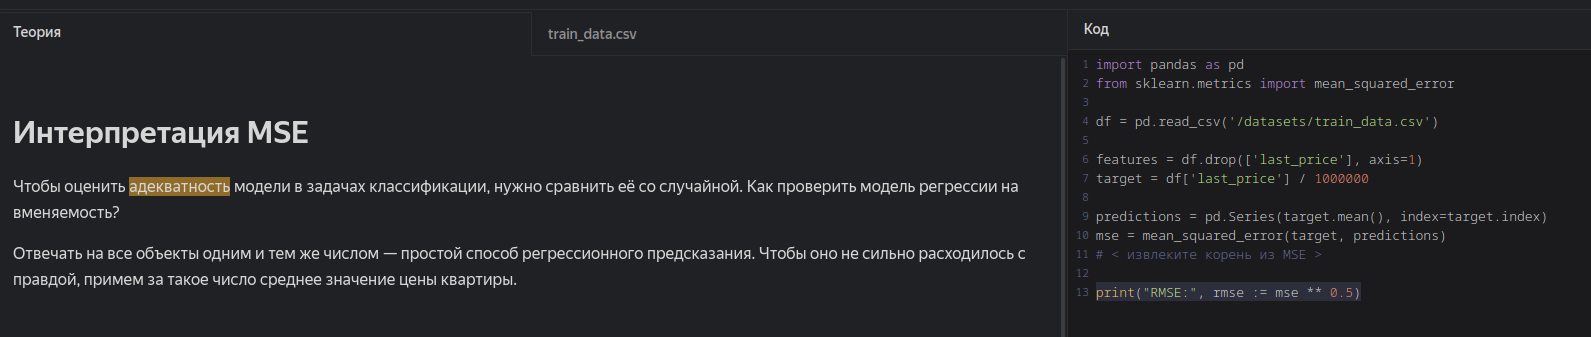

In [53]:
features = df.drop(['is_ultra'], axis=1)
df['tarifs_mean'] = 0.5
target = df['is_ultra'] / 2

In [54]:
predictions = pd.Series(target.mean(), index=target.index)
mse = mean_squared_error(target, predictions)

In [55]:
print("RMSE:", rmse := mse ** 0.5)

RMSE: 0.23051398646521953

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Для проверки модели на адекватность можно использовать DummyClassifier (из библиотеки sckit-learn). Это один вариант. Что делает DummyClassifier? У этой модели есть ряд стратегий (например strategy='most_frequent'). Это значит, что DummyClassifier просто и "тупо" будет предсказывать "количество / объём" самого часто встречающегося класса. Если в наших данных самый частый класс это "Смарт" и таких значений 69%, то эта можель и выдаст результат 0.69. То есть - она НЕ ДУМАЕТ, а просто тупо считает что-то и даёт результат.

Далее, зачем мы проверяем нашу лучшую модель на адекватность? Предположим, что ты работаешь над проектом 3 дня. Получаешь в итоге модель с результатом ... ну предположим 0.7. Что значит это 0.7? Отлично, это 70%. А это много или мало? Мы не знаем! Вроде бы не мало, да, целых 70%!! И тут мы решаем сравнить нашу лучшую модель с тупой. И "тупая" DummyClassifier выдает 0.69 )))) Что это значит? Это значит, что наша модель всего лишь на 1 процент лучше модели которая ничего-то и не предсказывает.

Итак, DummyClassifier - это просто напросто baseline, который твоя лучшая модель должна побить с максимальной разницей.
    
Второй вариант - сравнить самый часто встречающийся класс в наших данных (это is_ultra == 0). Таких значений 2.229 в нашем датафрейме. Всего же значений в датафрейме 3.214. Значит самый часто встречающийся класс "занимает" 69% (2229 / 3214 == 0.693528313627878). Вот мы и получили контрольные данные для сравнительной оценки, построенной нами "лучшей" модели. Наша лучшая модель должна "побить" этот скор.

p.s. (дополнительно, на перспективу!): можно было бы построить Confusion Matrix, чтобы детально посмотреть где ошибается модель. Подробнее о Confusion Matrix здесь: https://neptune.ai/blog/evaluation-metrics-binary-classification     
</div>

## Общий вывод

<div class="alert-info" style="padding: 20px; border-radius: 10px">

**Модели могут предсказывать с высокой долей вероятности какой из тарифов подойдет клиентам "Мегалайна", которые не спешат переходить на "Smart" и "Ultra"**

Но вопросы, которые были поставлены в ходе исследования остались:
- Почему клиенты остаются на старых тарифах?
- Есть ли корреляция между поведением клиентов на новых тарифах с поведением клиентов, которые остаются на старых.
- Зависимость поведения клиентов от стоимости тарифа (этой информации нет в изучаемом файле).
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
Всё отлично, результат достигнут.
    
Один совет (также, на будущее): как попытаться улучшить полученный результат, с минимум усилий? Ответ: мы использовали train для обучения модели, а valid - для поиска лучших значений гиперпараметров. Лучшие параметры нашли. Так почему бы теперь наши модели с выбранными гиперпараметрами не обучить на *общей* (тренировочной + валидационной) выборке (pd.concat() можно использовать для объединения). Чем больше данных, тем *лучше* модели смогут обучиться (надо проверять!). И вот теперь эту дообученную модель мы уже финально проверим на тестовой выборке (test).

Но следует учесть вот какой момент: нужно быть аккуратным с подобным «улучшением», если мы кодируем или масштабируем наши выборки. Например, в следующем проекте мы обучаемся на train’е, а затем делаем transform на валидации и тесте. Если после этого объединить трейн и валид, то это будет не совсем верно.

p.s. а вообще, достижение высокого скора не такая простая задача. Много моментов может влиять (подбор гиперпараметров - всего лишь один из них). В этой конкретно задаче мне кажется, что данных маловато, а также, возможно и фичей (столбцов в наших данных). Из-за этого модели не могут точно "настроиться на данные".
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Сергей, у тебя хорошая работа, все четко, осмысленно. Выводы присутствуют, с комментированием кода тоже никаких проблем нет.

Я оставил ряд советов на будущее (на результат этого проекта они не влияют). 

Я отправляю тебе проект ещё раз лишь для того, чтобы удостовериться что у тебя нет вопросов ко мне. Если их нет - пошли мне тетрадку ещё раз, и я тут же, без слов приму твою работу! 
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

      
В остальном всё чудно😊
    
    
Твой проект так и просится на github =) 
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
</div>

## Чек-лист готовности проекта

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75